In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = [x * 10 for x in range(10)]
data

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [3]:
labels = [f'{x}!' for x in range(10)]

labels

['0!', '1!', '2!', '3!', '4!', '5!', '6!', '7!', '8!', '9!']

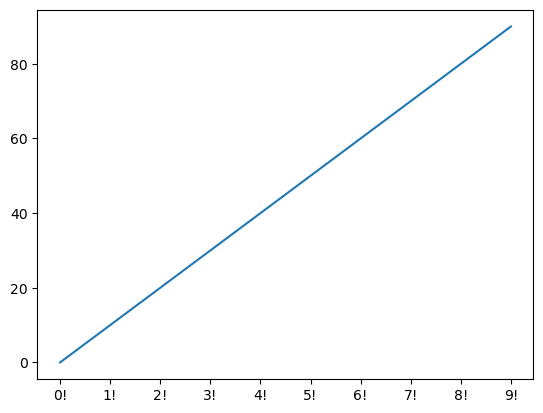

In [6]:
plt.plot(labels, data);

In [8]:
df = pd.DataFrame(data, labels).assign(series2 = lambda x: x[0]/2)

df.head()

,0,series2
0!,0,0.0
1!,10,5.0
2!,20,10.0
3!,30,15.0
4!,40,20.0


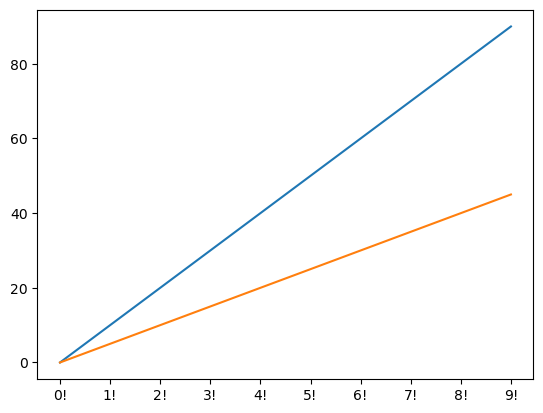

In [9]:
plt.plot(df);

### Object oriented plotting method

Text(0.5, 0.98, 'Overall-Title')

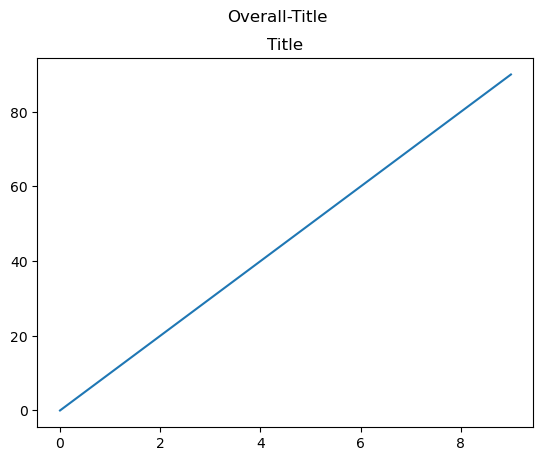

In [18]:
fig = plt.figure()

ax = fig.add_subplot()

ax.plot(data)
ax.set_title("Title")
fig.suptitle("Overall-Title")

## Plotting DataFrames

### When plotting DataFrames using the object-oriented interface, Matplotlib will use the index as the x-axis and plot each column as a separate series by default

In [22]:
data_dict = {
    "Sales" : [10, 20, 30, 40],
    "Profits": [2, 4, 3, 1],
    "Date" : ["2022-01-01", "2022-02-01", "2022-03-01", "2022-04-01"]
}

df = pd.DataFrame(
    data_dict,
    columns = ["Sales", "Profits"],
    index = data_dict["Date"]
)

df

,Sales,Profits
2022-01-01,10,2
2022-02-01,20,4
2022-03-01,30,3
2022-04-01,40,1


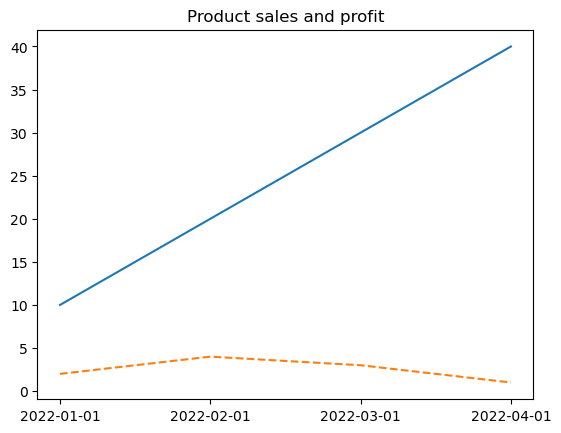

In [24]:
fig, ax = plt.subplots()

ax.plot(df.index, df["Sales"])
ax.plot(df.index, df["Profits"], ls="--") #ls is the line style
ax.set_title("Product sales and profit");

# Task: 01

# Finding Daily Revenue and Monthly Revenue from Hotel data


In [30]:
hotels = pd.read_excel("/Users/parvezshahshaik/Documents/Github/analyzing_global_coffee_market/Data/HotelCustomersDataset.xlsx")

In [32]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#In summary, this code reads data from an Excel file into a DataFrame, 
#calculates a new column "date" by subtracting the values in the "DaysSinceCreation" column from 
#a fixed date (December 31, 2018), and converts this result into a specific datetime data type for further analysis  
#or usage in date-based operations.

hotels["date"] = (
    pd.to_datetime("2018-12-31") - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")
).astype("datetime64[ns]")

In [35]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [37]:
hotels.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    83590 non-null  int64         
 1   Nationality           83590 non-null  object        
 2   Age                   79811 non-null  float64       
 3   DaysSinceCreation     83590 non-null  int64         
 4   AverageLeadTime       83590 non-null  int64         
 5   LodgingRevenue        83590 non-null  float64       
 6   OtherRevenue          83590 non-null  float64       
 7   BookingsCanceled      83590 non-null  int64         
 8   BookingsNoShowed      83590 non-null  int64         
 9   BookingsCheckedIn     83590 non-null  int64         
 10  PersonsNights         83590 non-null  int64         
 11  RoomNights            83590 non-null  int64         
 12  DaysSinceLastStay     83590 non-null  int64         
 13  DaysSinceFirstSt

In [38]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


### This code first calculates the daily revenue by grouping the hotel data by date and summing up the lodging and other revenues for each day. Then, it uses .resample("M") to convert this daily revenue data into monthly frequency and .sum() to aggregate the revenues for each month, providing a summary of monthly revenues.

In [43]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue" : "sum", "OtherRevenue": "sum"})
)

daily_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-01,10591.35,2472.96
2016-01-02,16600.46,11398.50
2016-01-03,13701.23,7978.80
2016-01-04,2896.70,750.98
2016-01-05,13940.15,6580.39


In [44]:
monthly_revenue = daily_revenue.resample("M").sum()

monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


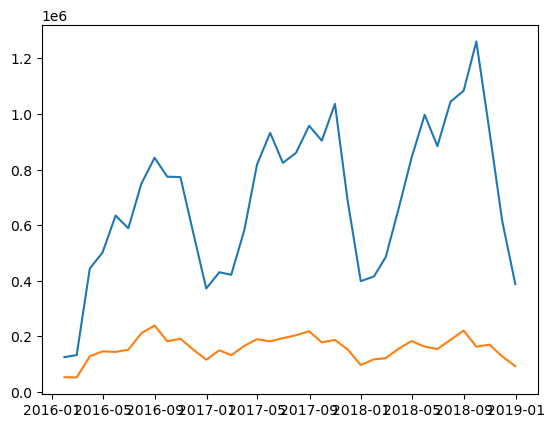

In [46]:
#Plotting the data 
# 1st Method
fig, ax = plt.subplots()

ax.plot(monthly_revenue);  #this style. automatically takes LodingRevenue as X-axis and OtherRevenue as Y-axis

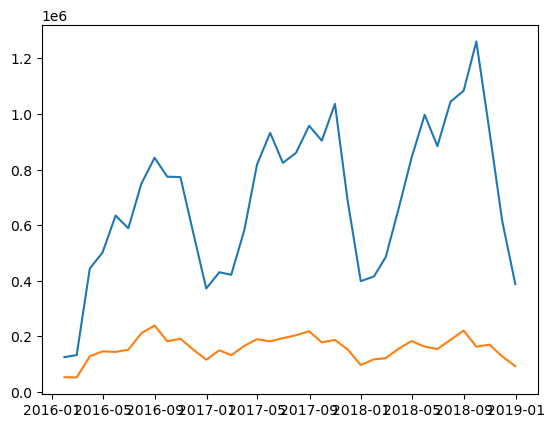

In [49]:
#Second Method
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"])
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"])

plt.show()

## Formatting Options
## Reducing the size of DF and saving MEMORY and adding titles adn axes to the charts

In [50]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

#### Putting it all together, the code reads data from the specified CSV file into the housing_raw DataFrame. It also converts the "period_begin" and "period_end" columns into datetime objects and specifies the data types for the "total_homes_sold" and "region_name" columns for more accurate representation and potential performance optimizations.

In [54]:
housing_raw = pd.read_csv(
    "/Users/parvezshahshaik/Documents/Github/analyzing_global_coffee_market/Data/housing_data.csv",
    parse_dates = ["period_begin", "period_end"],
    dtype ={"total_homes_sold": "Int32", "region_name": "category"}
)

In [55]:
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [56]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          567839 non-null  Int32         
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: Int32(1), category(1), datetime64[ns](2), float64(5)
memory usage: 37.5 MB


#### In summary, this code filters the housing_raw DataFrame to include only rows where the "region_name" contains "CA", and then creates a new column "region_name" in the filtered DataFrame ca_housing. The values in this new column are derived by slicing the original "region_name" strings to remove the last 11 characters.

In [58]:
ca_housing = housing_raw.loc[
    (housing_raw["region_name"].str.contains("CA"))
].assign(region_name = housing_raw["region_name"].str[0: -11])

#### memory_usage='deep', it calculates the memory usage of the DataFrame by considering the memory usage of the contents itself and not just the memory usage of the DataFrame's structure.

In [59]:
ca_housing.info(memory_usage= "deep") 

<class 'pandas.core.frame.DataFrame'>
Index: 15228 entries, 6 to 622302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region_name               15228 non-null  object        
 1   period_begin              15228 non-null  datetime64[ns]
 2   period_end                15228 non-null  datetime64[ns]
 3   total_homes_sold          14841 non-null  Int32         
 4   inventory                 15217 non-null  float64       
 5   active_listings           15218 non-null  float64       
 6   age_of_inventory          15217 non-null  float64       
 7   median_active_list_price  15208 non-null  float64       
 8   months_of_supply          14829 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(5), object(1)
memory usage: 1.9 MB


In [60]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


#### This code first creates a pivot table from the ca_housing DataFrame, organizing data based on the "period_begin" and "region_name" columns and using "median_active_list_price" as the values. Then, it calculates the row-wise average of the pivot table (across different regions for each date) and adds this information as a new column "CA_average" to the pivot table.

In [62]:
ca_housing_pivot = ca_housing.pivot_table(index= "period_begin",
                                         columns= "region_name",
                                         values= "median_active_list_price").assign(
                                         CA_average = lambda x: x.mean(axis=1))
ca_housing_pivot.head()

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,492258.437736
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1,493710.639623
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,495369.416981
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,497191.662264
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,499286.207547


In [63]:
ca_housing_markets = ca_housing_pivot.loc[ :, ["San Francisco",
                                               "Los Angeles",
                                               "San Diego",
                                               "CA_average"                     
                                              ]]
ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,499286.207547


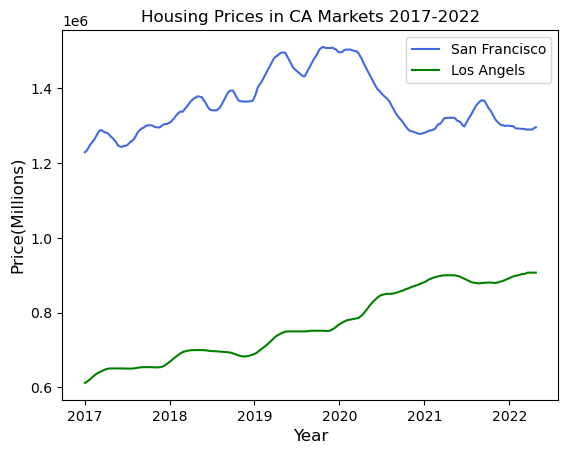

In [84]:
fig, ax = plt.subplots()

# ax.plot(ca_housing_markets)

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"],
    label= "San Francisco",
    color= "RoyalBlue",
#     linewidth=3 #Changes the sizes of the graph line
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"],
    label= "Los Angels",
    color= "Green",
#     linewidth=3 #Changes the sizes of the graph line
)

#fig.suptitle("big headline", fontsize= 16)

ax.set_title("Housing Prices in CA Markets 2017-2022", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Price(Millions)", fontsize=12)

ax.legend(loc="best")
# ax.legend(bbox_to_anchor=(1, -.1)) #specifyig the points on graph for legend

plt.show() #If you are using outsite the Jupyter notebook: Use Plt.show()

## ADJUSTING X-LIMITS and Y-LIMITS
### The set_ylim() and set_xlim() functions let you modify the axis limit
*    ax.set_xlim(lower limit, upper limit)

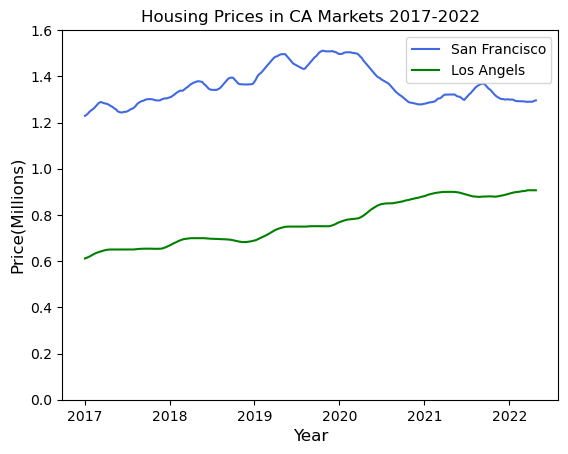

In [90]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"]/ 1000000, #Dividing this with 1000000 will get us in right value
    label= "San Francisco",
    color= "RoyalBlue",
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"] / 1000000,
    label= "Los Angels",
    color= "Green",
)

ax.set_title("Housing Prices in CA Markets 2017-2022", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Price(Millions)", fontsize=12)

ax.legend(loc="best")
ax.set_ylim(0, 1.6) #Give yaxis more space so that you have detailed data view

plt.show()

## FIGURE SIZE
### You can adjust the figure size with the 'figsize' argument
* figsize=(width,height) - the default size is 6.4 x 4.8 inches

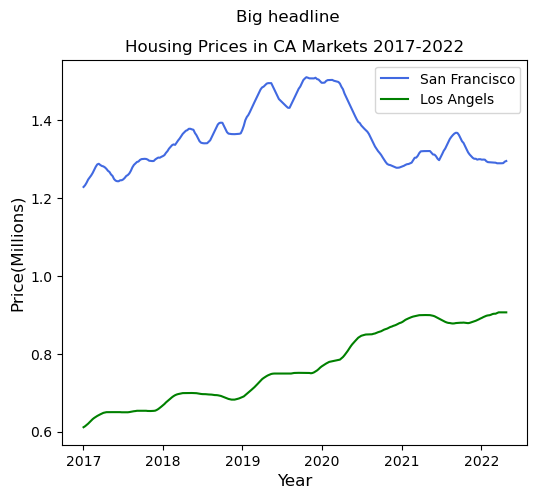

In [99]:
fig, ax = plt.subplots(figsize=(6, 5)) #FigSize adjusts the x and y axis length of chart

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"]/ 1000000, #Dividing this with 1000000 will get us in right value
    label= "San Francisco",
    color= "RoyalBlue",
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"] / 1000000,
    label= "Los Angels",
    color= "Green",
)

fig.suptitle("Big headline")
ax.set_title("Housing Prices in CA Markets 2017-2022", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Price(Millions)", fontsize=12)

ax.legend(loc="best")

plt.show()

## CUSTOM X-TICKS
### You can apply custom x-ticks with the set_xticks( ) and xticks( ) function
* ax.set_xticks(iterable)

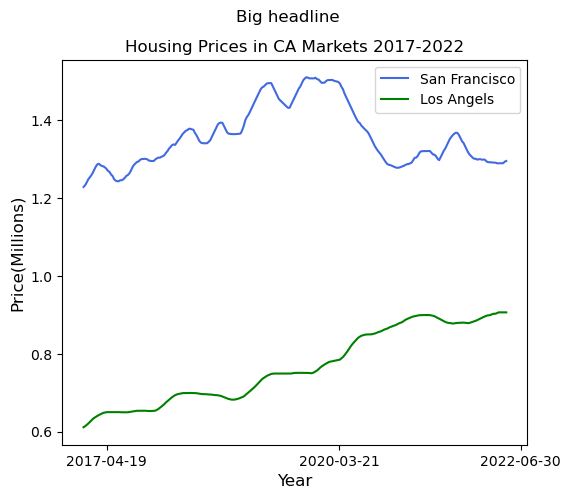

In [101]:
fig, ax = plt.subplots(figsize=(6, 5)) 

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"]/ 1000000, 
    label= "San Francisco",
    color= "RoyalBlue",
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"] / 1000000,
    label= "Los Angels",
    color= "Green",
)

fig.suptitle("Big headline")
ax.set_title("Housing Prices in CA Markets 2017-2022", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Price(Millions)", fontsize=12)

ax.set_xticks(['2017-04-19', '2020-03-21', '2022-06-30']) #Custom X-axis

ax.legend(loc="best")

plt.show()

### Another way to use x-ticks

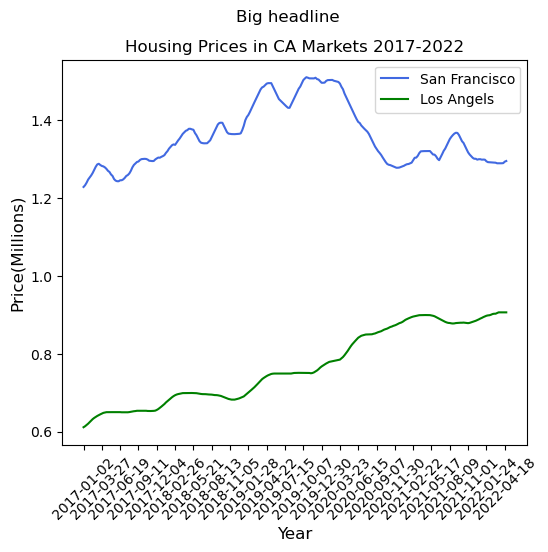

In [104]:
fig, ax = plt.subplots(figsize=(6, 5)) 

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"]/ 1000000, 
    label= "San Francisco",
    color= "RoyalBlue",
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"] / 1000000,
    label= "Los Angels",
    color= "Green",
)

fig.suptitle("Big headline")
ax.set_title("Housing Prices in CA Markets 2017-2022", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Price(Millions)", fontsize=12)

#ca_housing_markets.index[::12] refers to the index values of the ca_housing_markets DataFrame or Series. [::12] is
#a slicing notation that selects every 12th element from the index. 
#This means it's setting x-axis ticks at every 12th index position.
ax.set_xticks(ca_housing_markets.index[::12]) #Custom X-axis
plt.xticks(rotation=45) #this roatates the values on the x-axis

ax.legend(loc="best")

plt.show()

## ADDING VERTICLE LINES
### You can add vertical lined to mark key points with the axvline( ) function